Preprocessing task

1.import the given data
2.remove duplicate and a outerlier records
3.handle missing value
4.encode the categorical data
2.standardization
3.Normalization
4.dependent and independent variable
5.data startification while modeling



In [2]:
import requests
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# URL of the dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx"

# Send an HTTP request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the content to a file
    with open("Real_estate_valuation_data_set.xlsx", "wb") as file:
        file.write(response.content)
    print("Dataset downloaded successfully.")

    # Read the Excel file into a DataFrame
    df = pd.read_excel("Real_estate_valuation_data_set.xlsx")
    print("Dataset loaded into DataFrame successfully.")

    # Now you can proceed with your data preprocessing tasks or any analysis.

else:
    print("Failed to download the dataset.")


Dataset downloaded successfully.
Dataset loaded into DataFrame successfully.


In [3]:
# Assuming you have already imported pandas and loaded your dataset into the DataFrame df

df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
# 2. Remove duplicate and outlier records
df = df.drop_duplicates()
# Assuming 'X3 distance to the nearest MRT station' is a relevant feature for outlier removal
df = df[df['X3 distance to the nearest MRT station'] < (df['X3 distance to the nearest MRT station'].quantile(0.95))]


In [5]:
 #3. Handle missing values (if any)
 df.fillna(0, inplace=True)
 df.dropna(inplace=True)

In [6]:
# 4. Encode categorical data (if any)
# There are no categorical variables in this dataset.

In [7]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming you've already loaded your dataset into the DataFrame df

# 5. Standardization (Standard Scaling)
X_scaler = StandardScaler()
scaled_features = X_scaler.fit_transform(df.drop(['No', 'Y house price of unit area'], axis=1))
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[1:-1])
df_scaled.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,-0.824008,1.256426,-0.867823,1.973410,1.110681,0.366913
1,-0.824008,0.175160,-0.617968,1.625109,0.876039,0.306853
2,1.545968,-0.361148,-0.330166,0.231903,1.508863,0.668860
3,1.249721,-0.361148,-0.330166,0.231903,1.508863,0.668860
4,-1.120256,-1.079109,-0.523337,0.231903,0.789826,0.548739


In [8]:
# 6. Normalization (Min-Max Scaling)
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(df[['Y house price of unit area']])
df_normalized = pd.DataFrame(normalized_features, columns=[df.columns[-1]])

# Now you can proceed with the rest of your preprocessing steps.
df_normalized

,Y house price of unit area
0,0.275705
1,0.314832
2,0.361237
3,0.429481
4,0.323021
...,...
384,0.186533
385,0.385805
386,0.300273
387,0.408553


In [9]:
# 7. Dependent and independent variables
X = df_scaled
y = df_normalized

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have your features X and target variable y loaded and preprocessed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have X_train, X_test, y_train, and y_test for regression modeling
n_samples, n_features = X_train.shape



task and  model

implement regression algorithm , with stochastic gradient descent/ascend algorithm to predict house price  of unit area using MULti layer perception .

optimize the model using RMSGrad,ADAGrad

compare performance


In [12]:
import numpy as np
import keras
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.optimizers import RMSprop, Adagrad


# Model definition
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(28*28*5, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(24*24*5, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(1)  # Output layer for regression
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
 dropout_2 (Dropout)         (None, 5)                 0         
                                                                 
 dense_3 (Dense)             (None, 3920)              2

In [13]:
# Model compilation RMSprop
model.compile(
    optimizer=RMSprop(),
    loss='mean_squared_error',
    metrics=['mean_squared_error', 'accuracy']
)

# Model training
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluation and predictions
# Predict on test set
y_pred_rmsprop = model.predict(X_test)

# Calculate additional evaluation metrics for RMSprop
mse_rmsprop = mean_squared_error(y_test, y_pred_rmsprop)
mae_rmsprop = mean_absolute_error(y_test, y_pred_rmsprop)
rmse_rmsprop = np.sqrt(mean_squared_error(y_test, y_pred_rmsprop))
r2_rmsprop = r2_score(y_test, y_pred_rmsprop)

Epoch 1/10
10/10 [==============================] - 3s 157ms/step - loss: 0.0271 - mean_squared_error: 0.0271 - accuracy: 0.0032
Epoch 2/10
10/10 [==============================] - 2s 149ms/step - loss: 0.0160 - mean_squared_error: 0.0160 - accuracy: 0.0032
Epoch 3/10
10/10 [==============================] - 1s 145ms/step - loss: 0.0139 - mean_squared_error: 0.0139 - accuracy: 0.0032
Epoch 4/10
10/10 [==============================] - 1s 146ms/step - loss: 0.0128 - mean_squared_error: 0.0128 - accuracy: 0.0032
Epoch 5/10
10/10 [==============================] - 1s 133ms/step - loss: 0.0130 - mean_squared_error: 0.0130 - accuracy: 0.0032
Epoch 6/10
10/10 [==============================] - 1s 149ms/step - loss: 0.0108 - mean_squared_error: 0.0108 - accuracy: 0.0032
Epoch 7/10
10/10 [==============================] - 1s 143ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - accuracy: 0.0032
Epoch 8/10
10/10 [==============================] - 1s 144ms/step - loss: 0.0126 - mean_squared_e

In [14]:
print("Evaluation metrics using RMSprop:")
print("MSE:", mse_rmsprop)
print("MAE:", mae_rmsprop)
print("RMSE:", rmse_rmsprop)
print("R-squared:", r2_rmsprop)
print()

Evaluation metrics using RMSprop:
MSE: 0.006090909974906868
MAE: 0.05968752727359243
RMSE: 0.0780442821410183
R-squared: 0.46045907568668754



In [15]:
# Model compilation Adagrad
model.compile(
    optimizer=Adagrad(),
    loss='mean_squared_error',
    metrics=['mean_squared_error', 'accuracy']
)

# Model training
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predict on test set
y_pred_adagrad = model.predict(X_test)

# Calculate additional evaluation metrics for AdaGrad
mse_adagrad = mean_squared_error(y_test, y_pred_adagrad)
mae_adagrad = mean_absolute_error(y_test, y_pred_adagrad)
rmse_adagrad = np.sqrt(mean_squared_error(y_test, y_pred_adagrad))
r2_adagrad = r2_score(y_test, y_pred_adagrad)


Epoch 1/10
10/10 [==============================] - 2s 126ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - accuracy: 0.0032
Epoch 2/10
10/10 [==============================] - 1s 126ms/step - loss: 0.0093 - mean_squared_error: 0.0093 - accuracy: 0.0032
Epoch 3/10
10/10 [==============================] - 1s 126ms/step - loss: 0.0096 - mean_squared_error: 0.0096 - accuracy: 0.0032
Epoch 4/10
10/10 [==============================] - 1s 123ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - accuracy: 0.0032
Epoch 5/10
10/10 [==============================] - 1s 123ms/step - loss: 0.0093 - mean_squared_error: 0.0093 - accuracy: 0.0032
Epoch 6/10
10/10 [==============================] - 1s 112ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - accuracy: 0.0032
Epoch 7/10
10/10 [==============================] - 1s 113ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - accuracy: 0.0032
Epoch 8/10
10/10 [==============================] - 1s 113ms/step - loss: 0.0088 - mean_squared_e

In [16]:
print("Evaluation metrics using AdaGrad:")
print("MSE:", mse_adagrad)
print("MAE:", mae_adagrad)
print("RMSE:", rmse_adagrad)
print("R-squared:", r2_adagrad)

Evaluation metrics using AdaGrad:
MSE: 0.005690519805405291
MAE: 0.05831763085554723
RMSE: 0.07543553410300274
R-squared: 0.4959261705918536


Epoch 1/10
10/10 [==============================] - 1s 132ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - accuracy: 0.0032
Epoch 2/10
10/10 [==============================] - 1s 124ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - accuracy: 0.0032
Epoch 3/10
10/10 [==============================] - 1s 124ms/step - loss: 0.0095 - mean_squared_error: 0.0095 - accuracy: 0.0032
Epoch 4/10
10/10 [==============================] - 1s 117ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - accuracy: 0.0032
Epoch 5/10
10/10 [==============================] - 1s 113ms/step - loss: 0.0091 - mean_squared_error: 0.0091 - accuracy: 0.0032
Epoch 6/10
10/10 [==============================] - 1s 120ms/step - loss: 0.0093 - mean_squared_error: 0.0093 - accuracy: 0.0032
Epoch 7/10
10/10 [==============================] - 1s 108ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - accuracy: 0.0032
Epoch 8/10
10/10 [==============================] - 1s 115ms/step - loss: 0.0093 - mean_squared_e

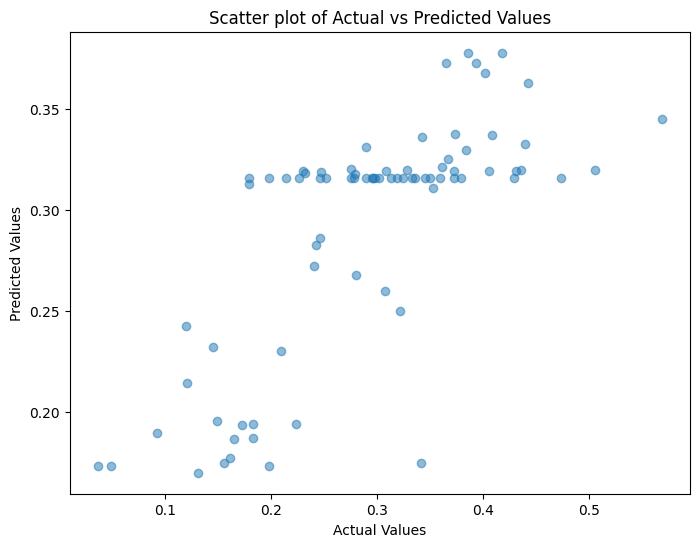

KeyError: 'val_loss'

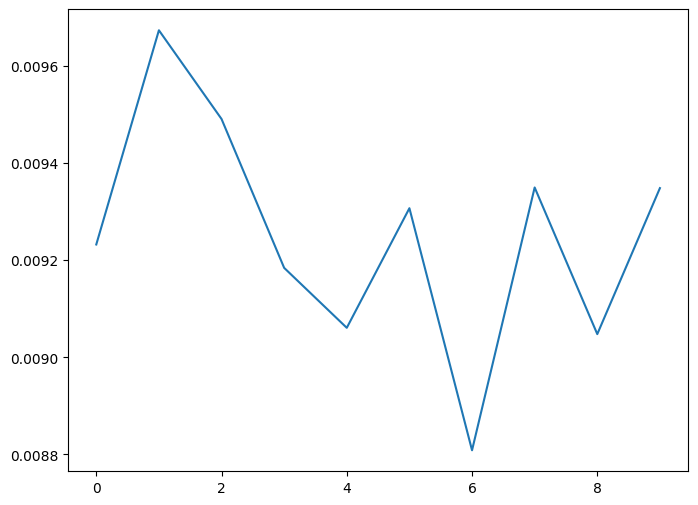

In [17]:
import matplotlib.pyplot as plt


history = model.fit(X_train, y_train, epochs=10, batch_size=32)

# Visualize model parameters
for layer in model.layers:
    if layer.trainable:
        print(layer.name)
        print(layer.get_weights())

# Predict on test set
y_pred_reg = model.predict(X_test)

# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_reg, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter plot of Actual vs Predicted Values')
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

dense_92
[array([[ 0.17952096,  0.03992095,  0.3528815 , -0.27902827, -0.24408543,
         0.2507343 , -0.17178018,  0.2609768 ,  0.00993983,  0.32535362,
        -0.27190807, -0.00191609,  0.07797863,  0.06824689,  0.30154592,
         0.06755657, -0.31191677, -0.08631395, -0.25816378,  0.34171477,
         0.2813081 ,  0.36766288,  0.26740322, -0.3747486 , -0.16468999,
        -0.26454687, -0.20146959, -0.3184193 , -0.06375478, -0.12229315,
        -0.03412174, -0.16299295],
       [ 0.00922882,  0.13284191,  0.37095758,  0.03899058,  0.3328291 ,
         0.34136492, -0.05378563,  0.39188662,  0.04603003, -0.36545175,
         0.2851675 , -0.21383679,  0.04963973, -0.09917537,  0.05818205,
         0.19068083,  0.0428782 , -0.2552682 ,  0.2046716 , -0.21711062,
         0.05522498,  0.3424442 ,  0.03564467,  0.30570573, -0.00138283,
        -0.09499646,  0.28439757,  0.35068202, -0.35535476, -0.20228659,
         0.28884158, -0.30318725],
       [-0.34369287,  0.29914516,  0.0174814

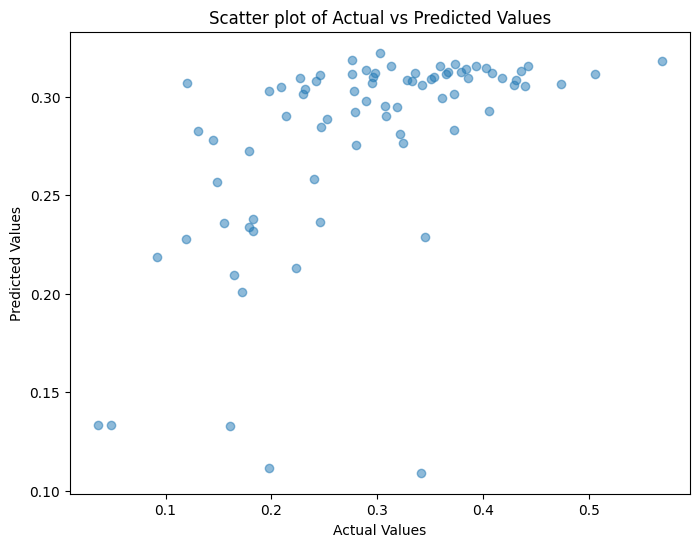

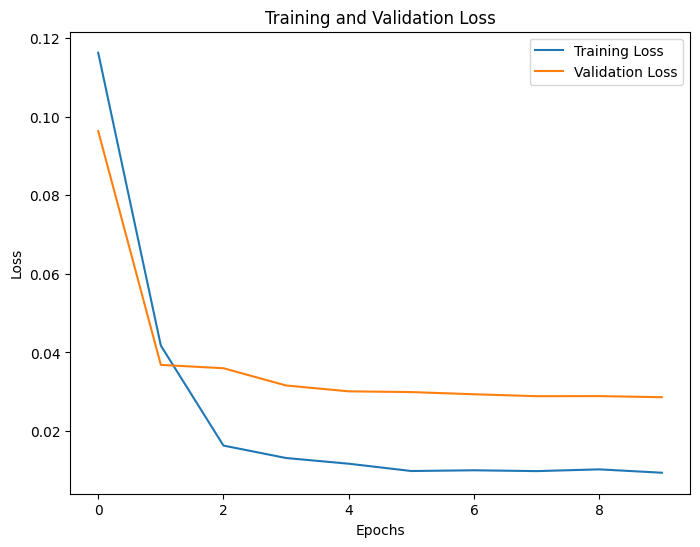

In [ ]:
import matplotlib.pyplot as plt

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=10, batch_size=32,  verbose=0, validation_split=0.1)

# Visualize model parameters
for layer in model.layers:
    if layer.trainable:
        print(layer.name)
        print(layer.get_weights())

# Predict on test set
y_pred_reg = model.predict(X_test)

# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_reg, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter plot of Actual vs Predicted Values')
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()